# COVID19 2021 - Data Visualization
## 코로나19 감염현황 - 데이터 시각화 (공공데이터 활용)

### Read the final processed data

In [4]:
import pandas as pd                   
import matplotlib.pyplot as plt       
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
df = pd.read_excel('코로나 19 감염 현황 가공 완료.xlsx')
df

,Unnamed: 0,누적 검사 수,사망자 수,확진자 수,기준일,누적 확진률,전일대비 사망자 수,전일대비 확진자 수,기준일_연도,기준일_월,기준일_요일,기준일_분기
0,0,4269312,917,61753,2021-01-01,1.508973,NaN,NaN,2021,1,Friday,1
1,1,4302792,942,62573,2021-01-02,1.517508,25.0,820.0,2021,1,Saturday,1
2,2,4340832,962,63230,2021-01-03,1.522015,20.0,657.0,2021,1,Sunday,1
3,3,4376602,981,64250,2021-01-04,1.534926,19.0,1020.0,2021,1,Monday,1
4,4,4439354,1007,64964,2021-01-05,1.530148,26.0,714.0,2021,1,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,19082135,5300,611650,2021-12-27,0.000000,55.0,4203.0,2021,12,Monday,4
361,361,19141481,5346,615514,2021-12-28,0.000000,46.0,3864.0,2021,12,Tuesday,4
362,362,19196738,5382,620921,2021-12-29,0.000000,36.0,5407.0,2021,12,Wednesday,4
363,363,19251165,5455,625955,2021-12-30,0.000000,73.0,5034.0,2021,12,Thursday,4


### Set the index

In [6]:
df.set_index('기준일', inplace=True)
df

,Unnamed: 0,누적 검사 수,사망자 수,확진자 수,누적 확진률,전일대비 사망자 수,전일대비 확진자 수,기준일_연도,기준일_월,기준일_요일,기준일_분기
기준일,,,,,,,,,,,
2021-01-01,0,4269312,917,61753,1.508973,NaN,NaN,2021,1,Friday,1
2021-01-02,1,4302792,942,62573,1.517508,25.0,820.0,2021,1,Saturday,1
2021-01-03,2,4340832,962,63230,1.522015,20.0,657.0,2021,1,Sunday,1
2021-01-04,3,4376602,981,64250,1.534926,19.0,1020.0,2021,1,Monday,1
2021-01-05,4,4439354,1007,64964,1.530148,26.0,714.0,2021,1,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,360,19082135,5300,611650,0.000000,55.0,4203.0,2021,12,Monday,4
2021-12-28,361,19141481,5346,615514,0.000000,46.0,3864.0,2021,12,Tuesday,4
2021-12-29,362,19196738,5382,620921,0.000000,36.0,5407.0,2021,12,Wednesday,4


### 일별 데이터 시각화

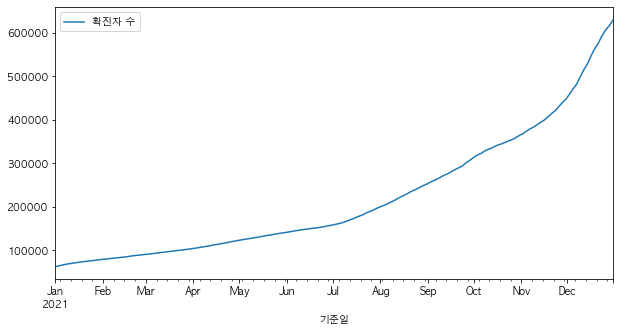

In [7]:
# 일별 확진자 수 시각화

df.plot(y='확진자 수', figsize=(10, 5))
plt.show()

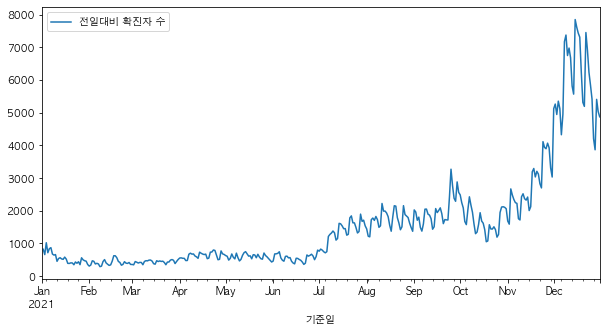

In [8]:
# 전일 대비 확진자 수

df.plot(y='전일대비 확진자 수', figsize=(10, 5))
plt.show()

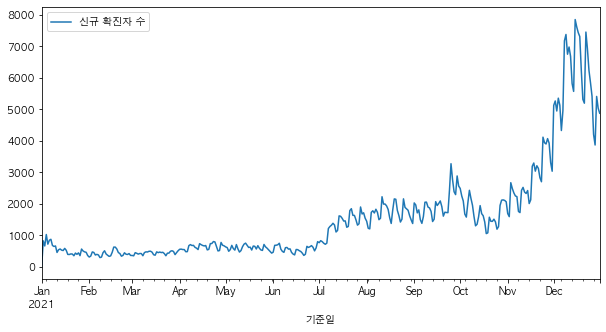

In [9]:
# 신규 확진자 수

df['신규 확진자 수'] = df['전일대비 확진자 수'].abs().fillna(0)
df.plot(y='신규 확진자 수', figsize=(10, 5))
plt.show()

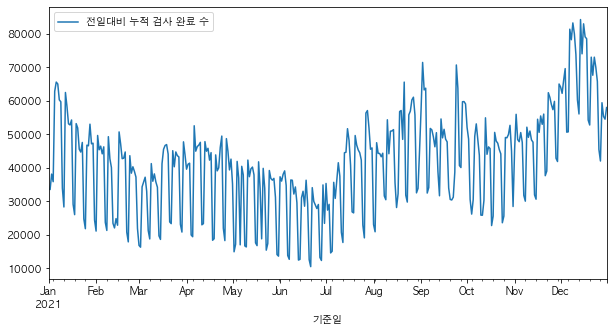

In [11]:
# 전일 대비 누적 검사 완료 수 시각화

df['전일대비 누적 검사 완료 수'] = df['누적 검사 수'].diff()
df.plot(y='전일대비 누적 검사 완료 수', figsize=(10, 5))
plt.show()

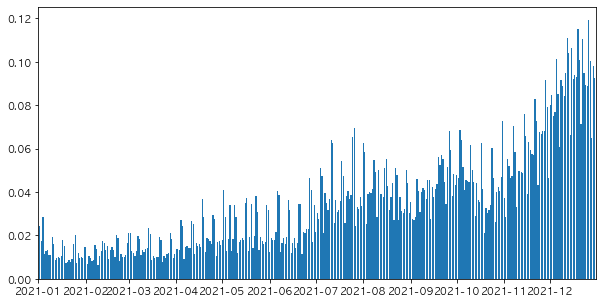

In [12]:
# 확진자 비율 시각화

import datetime
import numpy as np
df['확진자 비율'] = df['신규 확진자 수'] / df['전일대비 누적 검사 완료 수']
value = df['확진자 비율'].fillna(0).values
df['확진자 비율'] = np.where(np.isinf(value), 0, value)
plt.figure(figsize=(10, 5))
plt.bar(df['확진자 비율'].index, df['확진자 비율'].values)
plt.xlim([datetime.date(2021, 1, 1), datetime.date(2021, 12, 31)])
plt.show()

### 월별 데이터 시각화

In [13]:
# 기준일 재수정

df['기준일_월'] = df.index.month
df['기준일_주차'] = df.index.week
df

/var/folders/5r/bcxwxb6x521399lvd_5y9jwm0000gn/T/ipykernel_23842/2787612890.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['기준일_주차'] = df.index.week


,Unnamed: 0,누적 검사 수,사망자 수,확진자 수,누적 확진률,전일대비 사망자 수,전일대비 확진자 수,기준일_연도,기준일_월,기준일_요일,기준일_분기,신규 확진자 수,전일대비 누적 검사 완료 수,확진자 비율,기준일_주차
기준일,,,,,,,,,,,,,,,
2021-01-01,0,4269312,917,61753,1.508973,NaN,NaN,2021,1,Friday,1,0.0,NaN,0.000000,53
2021-01-02,1,4302792,942,62573,1.517508,25.0,820.0,2021,1,Saturday,1,820.0,33480.0,0.024492,53
2021-01-03,2,4340832,962,63230,1.522015,20.0,657.0,2021,1,Sunday,1,657.0,38040.0,0.017271,53
2021-01-04,3,4376602,981,64250,1.534926,19.0,1020.0,2021,1,Monday,1,1020.0,35770.0,0.028516,1
2021-01-05,4,4439354,1007,64964,1.530148,26.0,714.0,2021,1,Tuesday,1,714.0,62752.0,0.011378,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,360,19082135,5300,611650,0.000000,55.0,4203.0,2021,12,Monday,4,4203.0,41941.0,0.100212,52
2021-12-28,361,19141481,5346,615514,0.000000,46.0,3864.0,2021,12,Tuesday,4,3864.0,59346.0,0.065110,52
2021-12-29,362,19196738,5382,620921,0.000000,36.0,5407.0,2021,12,Wednesday,4,5407.0,55257.0,0.097852,52


In [14]:
# 월별 신규 확진자 수 합계 및 평균 계산

monthly = df.groupby(['기준일_월'])['신규 확진자 수'].agg(['sum', 'mean'])
monthly

,sum,mean
기준일_월,,
1,16444.0,530.451613
2,11467.0,409.535714
3,13415.0,432.741935
4,18927.0,630.900000
5,18331.0,591.322581
6,16623.0,554.100000
7,41374.0,1334.645161
8,53079.0,1712.225806
9,59863.0,1995.433333


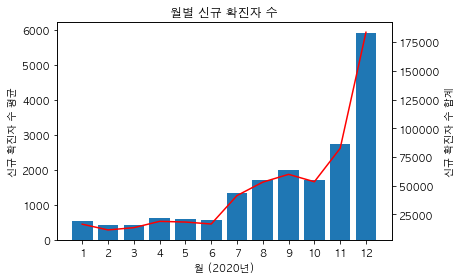

In [ ]:
# 월별 신규 확진자 수 시각화

fig, axis_y1 = plt.subplots()
axis_y2 = axis_y1.twinx()
axis_y2.plot(monthly['sum'].index, monthly['sum'].values, c='red')
axis_y2.set_ylabel('신규 확진자 수 합계')
axis_y1.bar(monthly['mean'].index, monthly['mean'].values)
axis_y1.set_ylabel('신규 확진자 수 평균')
axis_y1.set_xlabel('월 (2020년)')
plt.xticks(range(1, 13))
plt.title('월별 신규 확진자 수')
plt.show()

### 주차별 데이터 시각화

In [15]:
# 주차별 신규 확진자 수 합계 및 평균 계산

weekly = df.groupby(['기준일_주차'])['신규 확진자 수'].agg(['sum', 'mean'])
weekly

,sum,mean
기준일_주차,,
1,5413.0,773.285714
2,3685.0,526.428571
3,2748.0,392.571429
4,3121.0,445.857143
5,2690.0,384.285714
6,2630.0,375.714286
7,3467.0,495.285714
8,2680.0,382.857143
9,2799.0,399.857143


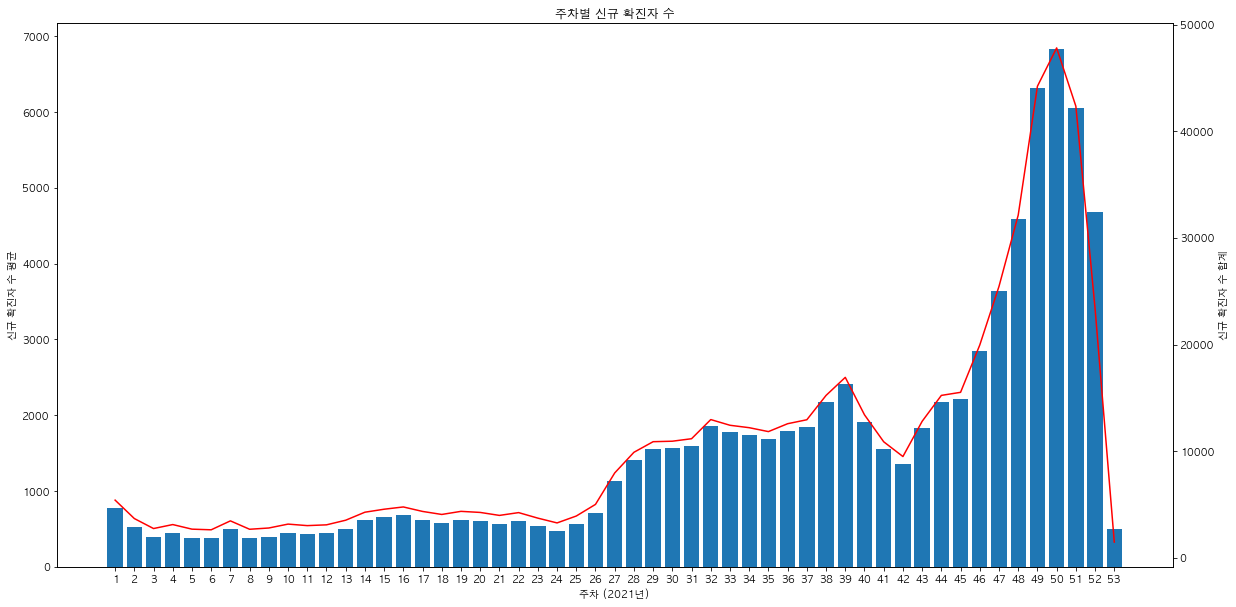

In [20]:
# 주차별 신규 확진자 수 시각화

fig, axis_y1 = plt.subplots(figsize=(20, 10))
axis_y2 = axis_y1.twinx()
axis_y2.plot(weekly['sum'].index, weekly['sum'].values, c='red')
axis_y2.set_ylabel('신규 확진자 수 합계')
axis_y1.bar(weekly['mean'].index, weekly['mean'].values)
axis_y1.set_ylabel('신규 확진자 수 평균')
axis_y1.set_xlabel('주차 (2021년)')
plt.xticks(range(1, 54))
plt.title('주차별 신규 확진자 수')
plt.show()